### Analysing System for science publication texts, machine learning based.


#### Including:

- Text Preprocessing

- KeyWords extraction

- Syntactic Parsing. Part of speech tagging

- Word Embedding (text vectors)

- Word2Vec Model Visualisation

- TF – IDF matrices

- Search cosine similarity between documents

- Five different algorithms for construction of summaries: improved "TextRank" from Gensim, usual TextRank, LSA, Kullback–Leibler, LexRank

- Final texts Visualisation

In [3]:
# Word2Vec model (word embeddings).
from gensim.models import Word2Vec

# This summarizer is based on the improved "TextRank" algorithm, and uses "BM25 ranking function".
from gensim.summarization import summarize, keywords

# Four different algorithms: usual TextRank, LSA, Kullback–Leibler, LexRank.
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.summarizers.kl import KLSummarizer
from sumy.summarizers.lex_rank import LexRankSummarizer

# Used for text preprocessing.
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

# ROUGE - set of metrics used for evaluating automatic summarization.
import sumy.evaluation.rouge as rouge

# Using for search cosine similarity between documents - articles.
from sklearn.metrics.pairwise import cosine_similarity

# Term Frequency – Inverse Document Frequency (TF – IDF).
from sklearn.feature_extraction.text import TfidfVectorizer

# t-distributed Stochastic Neighbor Embedding.
from sklearn.manifold import TSNE

# Used for text preprocessing and part of speech tagging.
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer

# Download NLTK corpuses.
nltk.download("stopwords")
nltk.download('wordnet')

import os
import string

# Used for data representation.
import pandas as pd
import numpy as np

# Used for visualisation.
import matplotlib.pyplot as plt
import pylab as pyl
from mpl_toolkits.mplot3d import axes3d

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ksenia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ksenia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
PATH_TEST_SET = 'C:/Users/Ksenia/Downloads/texts_analysing_system/UPDATED_schizophrenia_area/schizophrenia_dataset/'

#### -------------------------- Text Preprocessing ------------------------------------------------------------------------------

In [5]:
file_name_mapping = {}
test_set = []
count = 0

for file in os.listdir(PATH_TEST_SET):
    if file.endswith(".txt"):
        file_name_mapping[count] = file
        count += 1
        with open(PATH_TEST_SET + file, 'r') as f:
            for line in f:
                line = line.decode("ascii", "ignore")
                # document should always contain only one line
                test_set.append(line)

print('***** File Name Mapping *****')           
for k, v in file_name_mapping.items():
    print('{}: "{}"'.format(k, v))

***** File Name Mapping *****
0: "Association of Hormonal Contraception With Depression.txt"
1: "Behavioral Interventions for Antipsychotic Medication Associated Obesity.txt"
2: "Care for Adolescents with Depression in Primary Care Settings.txt"
3: "Cigarette Smoking and the Onset and Persistence of Panic Attacks During Mid-Adulthood in the United States.txt"
4: "Efficacy of Topiramate in the Treatment of Crack Cocaine Dependence.txt"
5: "Efficacy, Acceptability, and Tolerability of Antipsychotics in Treatment-Resistant Schizophrenia.txt"
6: "Exaggerated Acquisition and Resistance to Extinction of Avoidance Behavior in Treated Heroin-Dependent Men.txt"
7: "Short-term Suicide Risk After Psychiatric Hospital Discharge.txt"
8: "Treatment Preferences of Psychotherapy Patients with Chronic PTSD.txt"
9: "Use of Acetaminophen (Paracetamol) During Pregnancy .txt"


In [37]:
colors_mapping = {
    0: 'navy',
    1: 'darkmagenta',
    2: 'chartreuse',
    3: 'blue',
    4: 'plum',
    5: 'gold',
    6: 'dimgrey',
    7: 'red',
    8: 'darkgreen',    
    9: 'darkgoldenrod',
}

In [7]:
def text_preprocessing(test_set):
    prepared_test_set = list()
    for document in test_set:
        
        # tokenization – process of converting a text into tokens
        tokens = word_tokenize(document)
        
        # remove stop-words
        filtered_doc_words = [word for word in tokens if word not in stopwords.words('english')]
        
        # lemmatization process - procedure of obtaining the root form of the word
        wordnet_lemmatizer = WordNetLemmatizer()
        lemmatization_words = []
        for word in filtered_doc_words:
            lemm_word = wordnet_lemmatizer.lemmatize(word)
            lemmatization_words.append(lemm_word)
        
        prepared_doc = ' '.join(lemmatization_words)
        prepared_test_set.append(prepared_doc)
        
    return prepared_test_set

prepared_test_set = text_preprocessing(test_set)

#### -------------------------- KeyWords extraction ---------------------------------------------------------------------------

In [5]:
number_keywords = 8
keywords_test_set = {}
index = 0

for doc in prepared_test_set:
    extracted_keywords =  keywords(doc, words=number_keywords, scores=True, lemmatize=True)
    keywords_test_set[index] = extracted_keywords
    index += 1

In [6]:
dataframe = list()  
for value in keywords_test_set.values():
    dataframe.append(value)

In [7]:
KEYWORDS = pd.DataFrame(dataframe, columns=['KeyWord & Score']*8)
KEYWORDS

,KeyWord & Score,KeyWord & Score,KeyWord & Score,KeyWord & Score,KeyWord & Score,KeyWord & Score,KeyWord & Score,KeyWord & Score
0,"(user, [0.267216429183])","(contraceptive, [0.257075094941])","(use, [0.245066868162])","(woman, [0.212146079792])","(associated, [0.177051729335])","(psychiatric, [0.169170011267])","(diagnosis, [0.168346994999])","(hormonal, [0.163656483025])"
1,"(control, [0.234662902125])","(smi, [0.224329601417])","(medication, [0.166859435553])","(class, [0.166206461617])","(group, [0.166202166359])","(treatment, [0.164366642275])","(effective, [0.16394636219])","(interventions, [0.161796517003])"
2,"(costs, [0.3320741284])","(care, [0.276727789845])","(depression, [0.25152355147])","(effective, [0.246144203219])","(adolescents, [0.245083075426])","(health, [0.224768702332])","(intervention, [0.20406019158])","(group, [0.173564242552])"
3,"(smoking, [0.325133307891])","(year, [0.241450876136])","(attacks, [0.185775123445])","(onset, [0.184524269285])","(risk, [0.183135987694])","(data, [0.175294298524])","(wave, [0.167876710833])","(panic, [0.158807946924])"
4,"(cocaine, [0.371003971018])","(group, [0.313540014415])","(topiramate, [0.283979155483])","(subject, [0.251905802251])","(studied, [0.248619372311])","(use, [0.216307526629])","(treatment, [0.203472372092])","(placebo, [0.140252119317])"
5,"(clozapine, [0.299238648487])","(antipsychotic, [0.270985047024])","(effective, [0.249449074991])","(treatment, [0.234353855335])","(trials, [0.195890011285])","(schizophrenia, [0.193089950974])","(evidence, [0.155805473829])","(rcts, [0.155587895934])"
6,"(avoidance, [0.33637819377])","(opioid, [0.260168854614])","(behavioral, [0.250658044231])","(task, [0.183852159204])","(hiding, [0.171616781522])","(different, [0.170747799566])","(dependence, [0.163464685072])","(aversive, [0.14786346956])"
7,"(disorder, [0.400835511967])","(suicide, [0.328866517918])","(inpatient, [0.244975362963])","(cohort, [0.22359309293])","(adult, [0.215556334549])","(year, [0.211287295335])","(discharge, [0.177299101596])","(diagnosis, [0.155841064908])"
8,"(preferences, [0.422235830408])","(patients, [0.370151609122])","(treatment, [0.331900856392])","(outcome, [0.251996545759])","(psychotherapy, [0.232550057254])","(ptsd, [0.196338779899])","(depressed, [0.146501862787])","(clinical, [0.138754563027])"
9,"(study, [0.318763258672])","(adhd, [0.288811247658])","(pregnancy, [0.271242939913])","(risk, [0.264390659747])","(acetaminophen, [0.224141572013])","(attention, [0.170819185708])","(use, [0.165406795656])","(offspring, [0.139080819912])"


#### -------------------------- Syntactic Parsing. Part of speech tagging. ----------------------------------------------------------------------

Universal Part-of-Speech Tagset:

CC: conjunction, coordinating

CD: numeral, cardinal

DT: determiner

IN: preposition or conjunction, subordinating

JJ: adjective or numeral, ordinal

JJR: adjective, comparative

JJS: adjective, superlative

LS: list item marker

MD: modal auxiliary

NN: noun, common, singular or mass

NNP: noun, proper, singular

NNS: noun, common, plural

PDT: pre-determiner

POS: genitive marker

PRP: pronoun, personal

RB: adverb

RBR: adverb, comparative

RBS: adverb, superlative

RP: particle

UH: interjection

VB: verb, base form

VBD: verb, past tense

VBG: verb, present participle or gerund

VBN: verb, past participle

VBP: verb, present tense, not 3rd person singular

VBZ: verb, present tense, 3rd person singular

WDT: WH-determiner

WP: WH-pronoun

WRB: Wh-adverb

In [8]:
partofspeech_tagging_all = list()
for doc in prepared_test_set:
    tokens = word_tokenize(doc)
    partofspeech_tagging_doc = pos_tag(tokens)
    partofspeech_tagging_all.append(partofspeech_tagging_doc)

# for example, to print tagged text, for '3' article
partofspeech_tagging_all[3]

[(u'Cigarette', 'NNP'),
 (u'Smoking', 'NNP'),
 (u'Onset', 'NNP'),
 (u'Persistence', 'NNP'),
 (u'Panic', 'NNP'),
 (u'Attacks', 'NNP'),
 (u'During', 'IN'),
 (u'Mid-Adulthood', 'NNP'),
 (u'United', 'NNP'),
 (u'States', 'NNPS'),
 (u':', ':'),
 (u'19942005', 'CD'),
 (u'.', '.'),
 (u'The', 'DT'),
 (u'current', 'JJ'),
 (u'study', 'NN'),
 (u'examined', 'VBD'),
 (u'relationship', 'NN'),
 (u'cigarette', 'NN'),
 (u'smoking', 'NN'),
 (u'(', '('),
 (u'daily', 'JJ'),
 (u')', ')'),
 (u'risk', 'NN'),
 (u'onset', 'VBN'),
 (u'persistence', 'NN'),
 (u'panic', 'JJ'),
 (u'attack', 'NN'),
 (u'10-year', 'JJ'),
 (u'period', 'NN'),
 (u'among', 'IN'),
 (u'adult', 'JJ'),
 (u'mid-adulthood', 'NN'),
 (u'United', 'NNP'),
 (u'States', 'NNPS'),
 (u'whether', 'IN'),
 (u'quitting', 'VBG'),
 (u'smoking', 'NN'),
 (u'reduced', 'VBN'),
 (u'risk', 'NN'),
 (u'panic', 'NN'),
 (u'attack', 'NN'),
 (u'.', '.'),
 (u'Data', 'NNP'),
 (u'drawn', 'NN'),
 (u'Midlife', 'NNP'),
 (u'Development', 'NNP'),
 (u'United', 'NNP'),
 (u'States',

#### -------------------------- TF – IDF matrices and Search cosine similarity between documents ---------------------

In [27]:
# remove morphological affixes from words, leaving only the word stem
stemmer = nltk.stem.porter.PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    tokens = [i for i in tokens if i not in string.punctuation]
    stems = stem_tokens(tokens, stemmer)
    return stems

# TF-IDF matrix for corpus 
corpus_tfidf = TfidfVectorizer(stop_words='english', tokenizer=tokenize)
corpus_representation = corpus_tfidf.fit_transform(prepared_test_set)

feature = corpus_tfidf.get_feature_names()

corpus_representation_arr = corpus_representation.toarray()

In [28]:
def cosine_similarity_results(query_doc):
    tfidf_query_doc = corpus_tfidf.transform([query_doc])
    tfidf_query_doc = tfidf_query_doc.toarray()
    row_i = []
    for i in xrange(len(prepared_test_set)):
        cosine_dist = cosine_similarity(
            corpus_representation_arr[i].reshape(1,-1), tfidf_query_doc.reshape(1,-1))
        row_i.append(cosine_dist[0][0])

    cosine_sim_data.append(row_i)

    
cosine_sim_data = list()    
for doc in prepared_test_set:
    cosine_similarity_results(doc)
    
    
cosine_sim_data = pd.DataFrame(cosine_sim_data)
cosine_sim_data

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.034089,0.180694,0.113921,0.050035,0.056621,0.022881,0.132950,0.022842,0.058019
1,0.034089,1.000000,0.218488,0.026610,0.124270,0.160558,0.132686,0.038655,0.098097,0.027360
2,0.180694,0.218488,1.000000,0.063669,0.074725,0.105794,0.031528,0.105139,0.056997,0.023949
3,0.113921,0.026610,0.063669,1.000000,0.041659,0.028964,0.037672,0.074677,0.007189,0.069383
4,0.050035,0.124270,0.074725,0.041659,1.000000,0.089960,0.081207,0.023775,0.076625,0.043167
5,0.056621,0.160558,0.105794,0.028964,0.089960,1.000000,0.039640,0.057755,0.089039,0.042445
6,0.022881,0.132686,0.031528,0.037672,0.081207,0.039640,1.000000,0.026008,0.055159,0.059277
7,0.132950,0.038655,0.105139,0.074677,0.023775,0.057755,0.026008,1.000000,0.048437,0.087947
8,0.022842,0.098097,0.056997,0.007189,0.076625,0.089039,0.055159,0.048437,1.000000,0.034432
9,0.058019,0.027360,0.023949,0.069383,0.043167,0.042445,0.059277,0.087947,0.034432,1.000000


#### -------------------------- Summary by improved "TextRank" --------------------------------------------------

In [11]:
summary_len_words = 150
count = 0

with open('C:/Users/kvoronaya/Downloads/summaries_schizophrenia/gensim_summaries.txt', 'w') as ff:
    for doc in test_set:
        summary = summarize(doc, word_count=summary_len_words)
        val = '\n\n\n ******* The name of the file is "{}" ******* \n'.format(file_name_mapping[count])
        print(val)
        ff.write(val)
        count += 1
        print(summary)
        ff.write(summary)




 ******* The name of the file is "Association of Hormonal Contraception With Depression.txt" ******* 

In a nationwide prospective cohort study of more than 1 million women living in Denmark, an increased risk for first use of an antidepressant and first diagnosis of depression was found among users of different types of hormonal contraception, with the highest rates among adolescents.
To investigate whether the use of hormonal contraception is positively associated with subsequent use of antidepressants and a diagnosis of depression at a psychiatric hospital.
All women and adolescents aged 15 to 34 years who were living in Denmark were followed up from January 1, 2000, to December 2013, if they had no prior depression diagnosis, redeemed prescription for antidepressants, other major psychiatric diagnosis, cancer, venous thrombosis, or infertility treatment.
Adolescents (age range, 15-19 years) using combined oral contraceptives had an RR of a first use of an antidepressant of 1.8 (


In this national retrospective longitudinal cohort of almost 1.9 million adult inpatients in the Medicaid program, suicide risk during the first 90 days after hospital discharge was highest for patients with first-listed depressive disorders, followed by those with bipolar disorder, schizophrenia, and substance use disorders and lowest for patients with nonmental disorders.
To describe the risk for suicide during the 90 days after hospital discharge for adults with first-listed diagnoses of depressive disorder, bipolar disorder, schizophrenia, substance use disorder, and other mental disorders in relation to inpatients with diagnoses of nonmental disorders and the general population.
This national retrospective longitudinal cohort included inpatients aged 18 to 64 years in the Medicaid program who were discharged with a first-listed diagnosis of a mental disorder (depressive disorder, bipolar disorder, schizophrenia, substance use disorder, and other mental disorder) and a 10% random 

#### ------------------------ Summaries by algorithms: usual TextRank, LSA, Kullback–Leibler, LexRank -----------------------------

In [8]:
# to regulate the length of summary
SENTENCES_COUNT = 8

stemmer = Stemmer("english")
summaries_mapping = {0: 'usual TextRank', 1: 'LSA', 2: 'Kullback–Leibler', 3: 'LexRank'}
metrics = {}
f_index = 0

with open('C:/Users/Ksenia/Downloads/schizo_summaries.txt', 'w') as fff:
    for file in os.listdir(PATH_TEST_SET):
        if file.endswith(".txt"):
            rouge_metrics=list()
            val = '\n\n ************ Summaries for file {}. ************ \n'.format(file)
            print(val)
            fff.write(val)
            parsed_text = PlaintextParser.from_file(PATH_TEST_SET + file, Tokenizer("english"))
            summarizers = [
                TextRankSummarizer(stemmer), 
                LsaSummarizer(stemmer), 
                KLSummarizer(stemmer), 
                LexRankSummarizer(stemmer)
            ]
            for summarizer in summarizers:
                summarizer.stop_words = get_stop_words("english")

            summaries = [[]] * 4
            for i in range(4):
                val1 = '\n--------- Summary by {} algorithm --------- \n'.format(summaries_mapping[i])
                print(val1)
                fff.write(val1)
                for sentence in summarizers[i](parsed_text.document, SENTENCES_COUNT):
                    summaries[i].append(sentence)
                    print(sentence)
                    fff.write(str(sentence))
                
                # computing of Recall-Oriented Understudy for Gisting Evaluation (ROUGE)
                rouge_metrics.append(rouge.rouge_n(summaries[i], parsed_text.document.sentences, n=3))
                
            metrics[f_index] = rouge_metrics
            f_index += 1



 ************ Summaries for file Association of Hormonal Contraception With Depression.txt. ************ 


--------- Summary by usual TextRank algorithm --------- 

Compared with nonusers, users of combined oral contraceptives had an RR of first use of an antidepressant of 1.23 (95% CI, 1.22-1.25).
Users of progestogen-only pills had an RR for first use of an antidepressant of 1.34 (95% CI, 1.27-1.40); users of a patch (norgestrolmin), 2.0 (95% CI, 1.76-2.18); users of a vaginal ring (etonogestrel), 1.6 (95% CI, 1.55-1.69); and users of a levonorgestrel intrauterine system, 1.4 (95% CI, 1.31-1.42).
Adolescents (age range, 15-19 years) using combined oral contraceptives had an RR of a first use of an antidepressant of 1.8 (95% CI, 1.75-1.84) and those using progestin-only pills, 2.2 (95% CI, 1.99-2.52).
When the reference group was changed to those who never used hormonal contraception, the RR estimates for users of combined oral contraceptives increased to 1.7 (95% CI, 1.66-1.71).
C

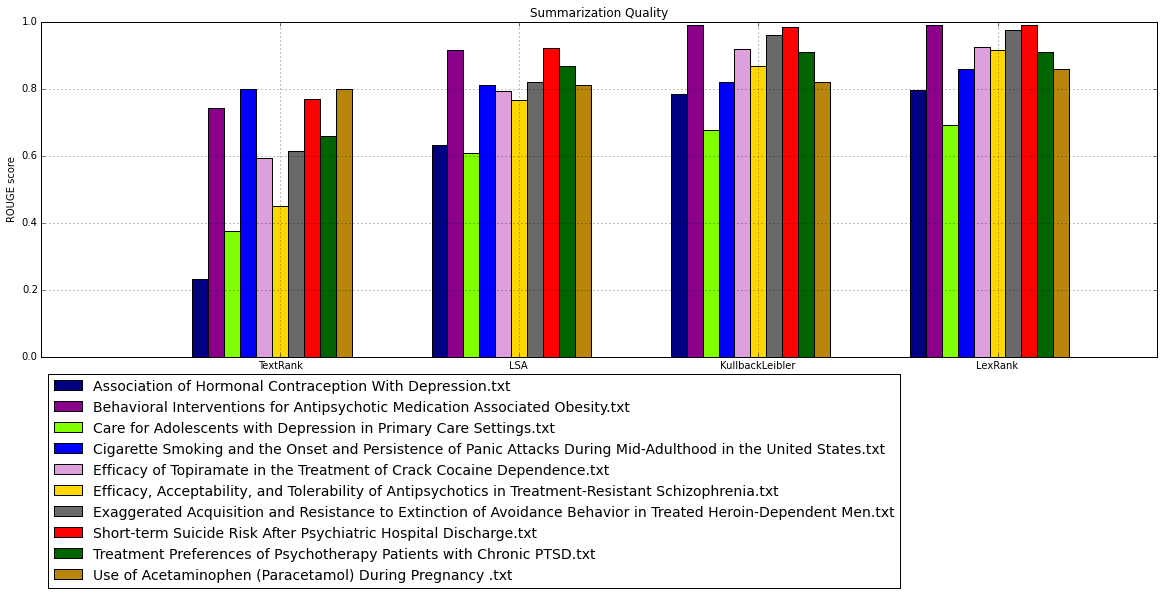

In [41]:
# visualization for ROUGE metric
%matplotlib inline 
texts_number = len(metrics.keys())
width = 10
ii = [0, 150, 300, 450]
colorlabels = list()
filenamescolors = list()

fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111)

for text_index in range(texts_number):   
    ind = list()
    for elem in ii:
        position = elem + (width*text_index)
        ind.append(position) 
    yvals = metrics[text_index]
    color = colors_mapping[text_index]
    filenamescolors.append(file_name_mapping[text_index])
    label = ax.bar(ind, yvals, width, color=color, align='center')
    colorlabels.append(label[0])
    if text_index == int(texts_number/2):
        xticks = ind

ax.set_title('Summarization Quality')
ax.set_ylabel('ROUGE score')
ax.set_xticks(xticks)
ax.set_xticklabels(('TextRank', 'LSA', 'KullbackLeibler', 'LexRank'))
ax.grid()
ax.legend(colorlabels, filenamescolors, loc='upper left', ncol=1, fontsize=14, bbox_to_anchor=(0, -0.03))
plt.show()   

#### ----------------------------------------------- Texts Visualisation ------------------------------------------------

In [10]:
stemmer = nltk.stem.porter.PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    tokens = [i for i in tokens if i not in string.punctuation]
    stems = stem_tokens(tokens, stemmer)
    return stems

# TF-IDF matrix for corpus, extracting 4-gramms
corpus_tfidf = TfidfVectorizer(
    ngram_range=(4,4), stop_words='english', tokenizer=tokenize)
corpus_representation = corpus_tfidf.fit_transform(prepared_test_set)
features= corpus_tfidf.get_feature_names()
corpus_representation_arr = corpus_representation.toarray()

In [11]:
ngramm_representation = corpus_representation_arr.transpose()

# similar to PCA method for dimension reduction
newtsne = TSNE(n_components=3)

In [12]:
ngramm_representation.shape

reduced_matr = newtsne.fit_transform(ngramm_representation)
reduced_matr.shape

(2231L, 3L)

In [13]:
ngramms_number, texts_number = ngramm_representation.shape

In [15]:
mappingfeatures = {}

for i in xrange(int(texts_number)):
    features_presented = []
    doc_raw = enumerate(corpus_representation_arr[i])
    for ngram in doc_raw:
        if ngram[1] > 0.0:
            features_presented.append(ngram[0])
            
    mappingfeatures[i] = features_presented

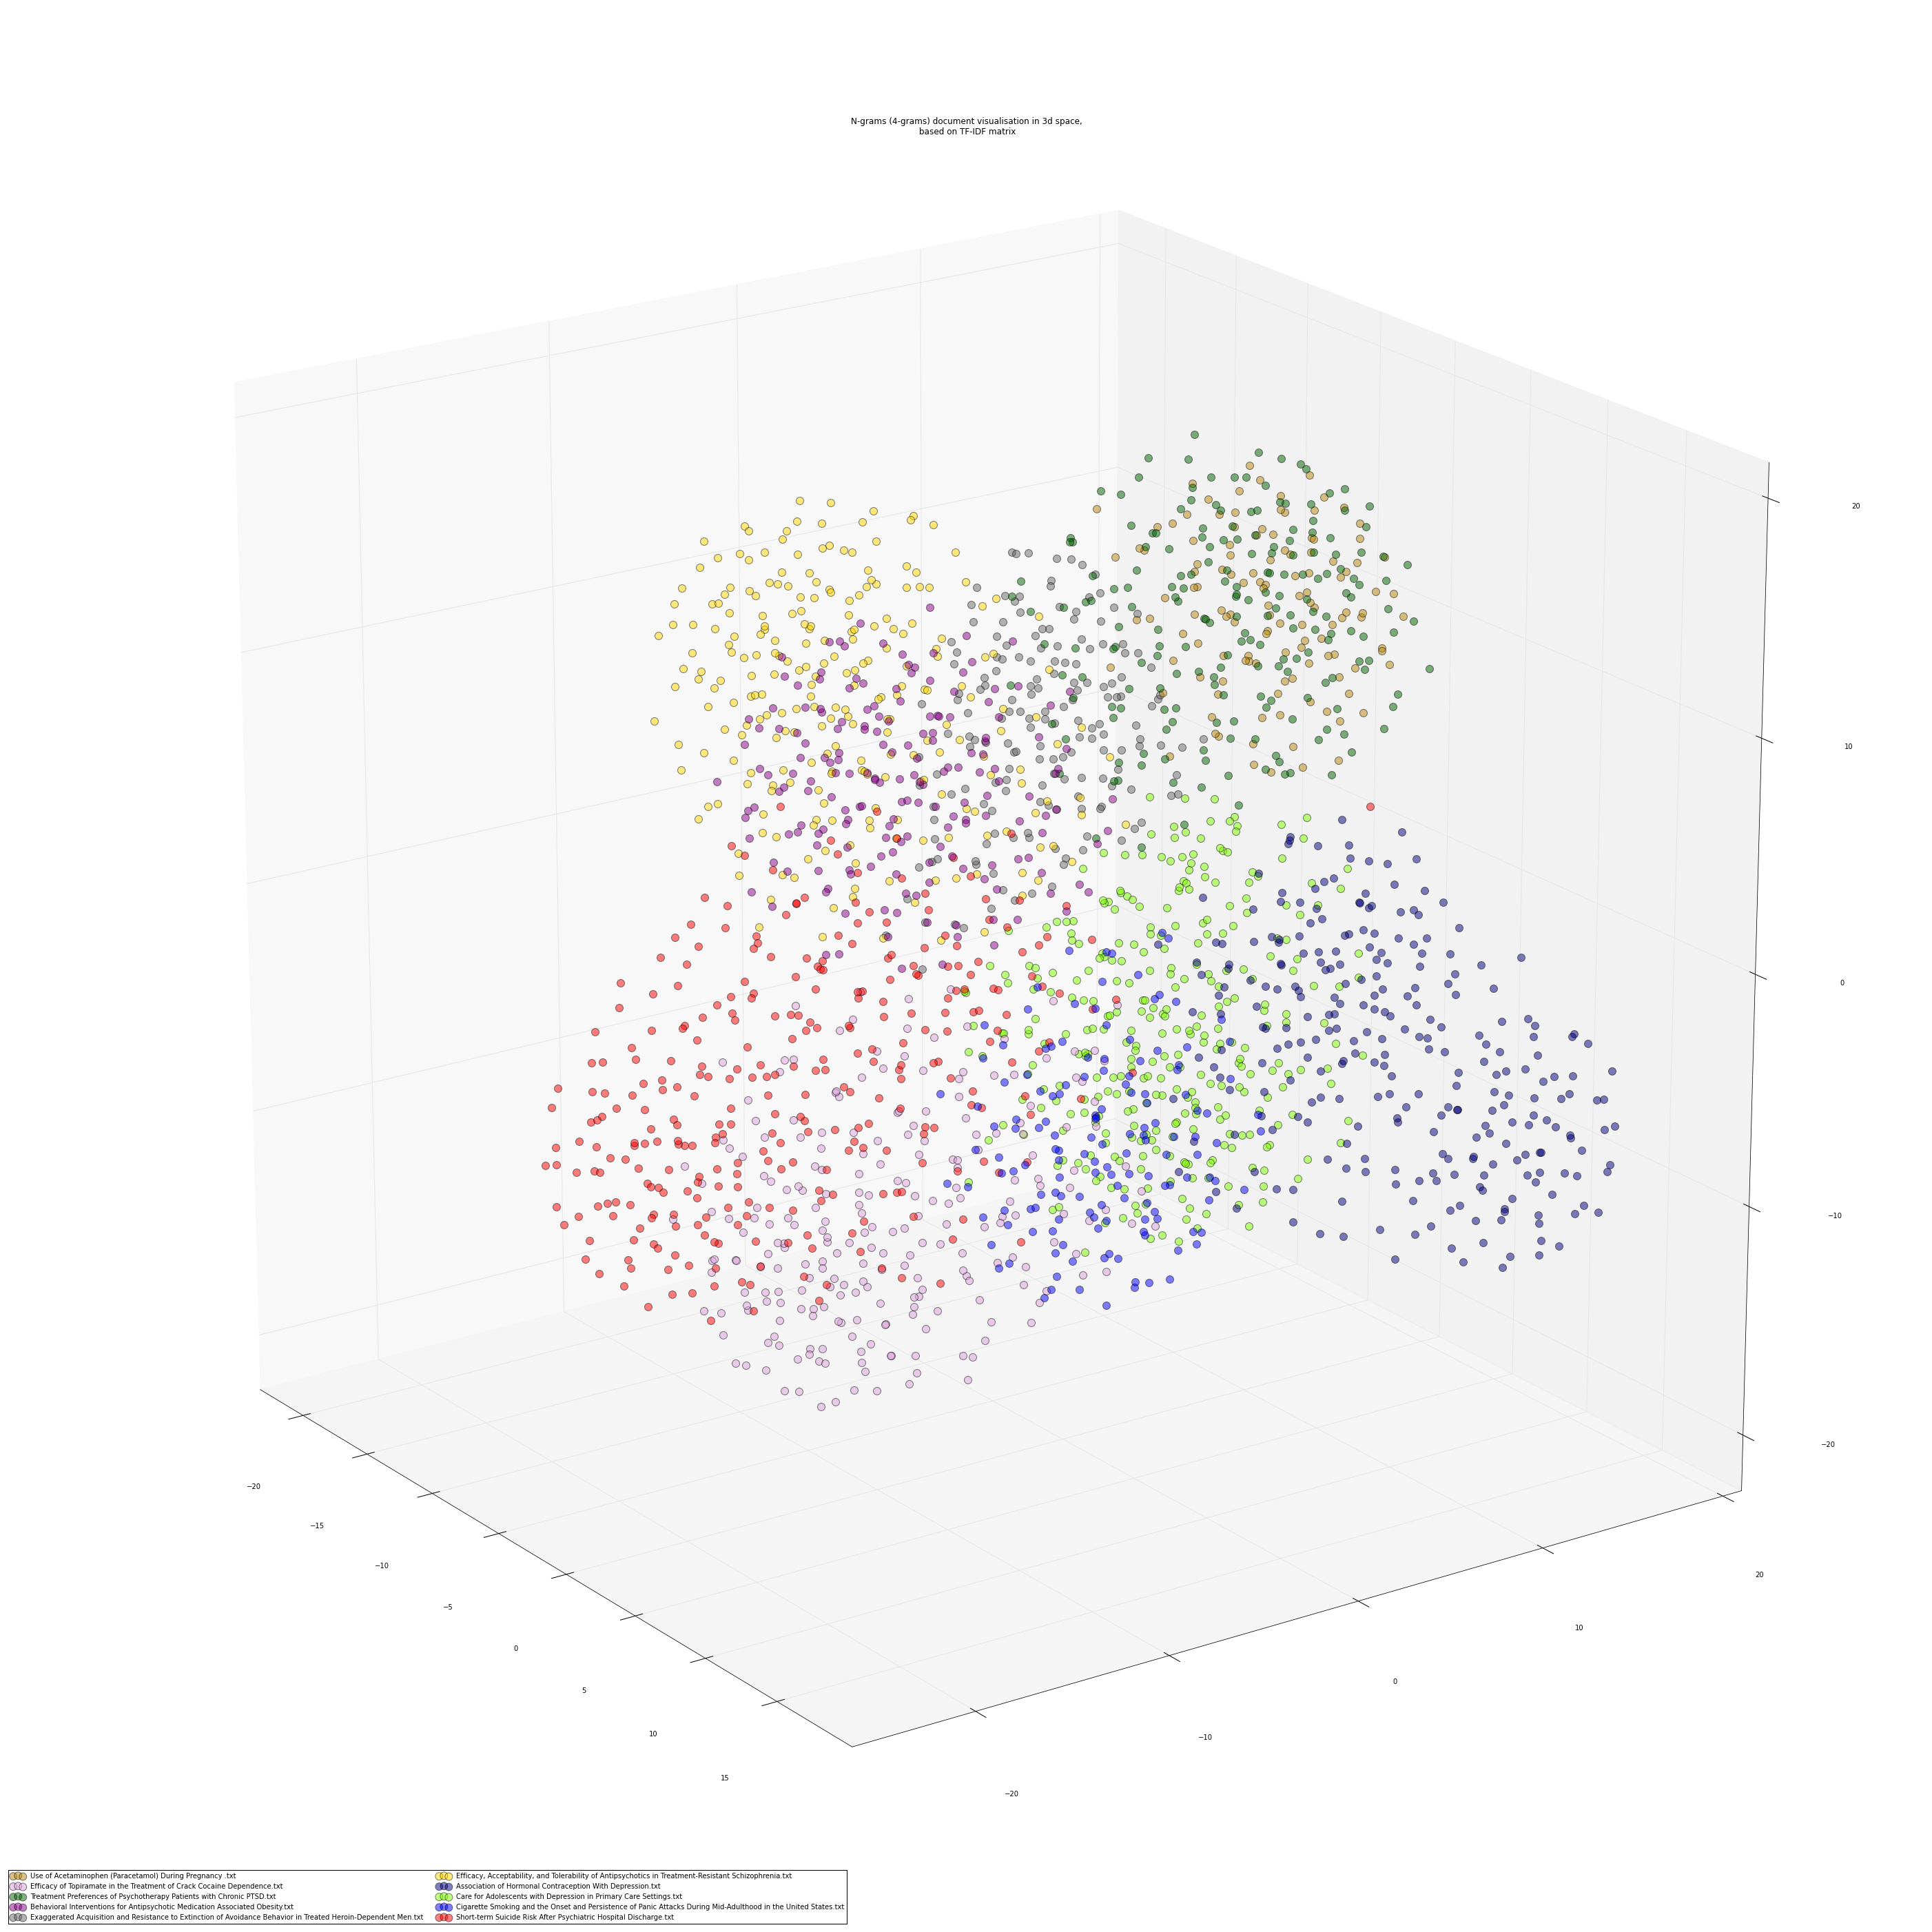

In [42]:
fig = plt.figure(figsize=(50,50))
ax = fig.gca(projection='3d')
set_labels = set()

for i in xrange((ngramms_number-1)):
    xs = reduced_matr[i,0]
    ys = reduced_matr[i,1]
    zs = reduced_matr[i,2]
    
    color = None
    label = None
    
    if i in mappingfeatures[0]:
        color = colors_mapping[0]
        label = '{}'.format(file_name_mapping[0])
    
    if i in mappingfeatures[1]:
        color = colors_mapping[1]
        label = '{}'.format(file_name_mapping[1])
        
    if i in mappingfeatures[2]:
        color = colors_mapping[2]
        label = '{}'.format(file_name_mapping[2])
        
    if i in mappingfeatures[3]:
        color = colors_mapping[3]
        label = '{}'.format(file_name_mapping[3])
        
    if i in mappingfeatures[4]:
        color = colors_mapping[4]
        label = '{}'.format(file_name_mapping[4])
    
    if i in mappingfeatures[5]:
        color = colors_mapping[5]
        label = '{}'.format(file_name_mapping[5])    
         
    if i in mappingfeatures[6]:
        color = colors_mapping[6]
        label = '{}'.format(file_name_mapping[6])
        
    if i in mappingfeatures[7]:
        color = colors_mapping[7]
        label = '{}'.format(file_name_mapping[7])
        
    if i in mappingfeatures[8]:
        color = colors_mapping[8]
        label = '{}'.format(file_name_mapping[8])
        
    if i in mappingfeatures[9]:
        color = colors_mapping[9]
        label = '{}'.format(file_name_mapping[9])
        
    if label in set_labels:
        label = None
    else:    
        set_labels.add(label)
        
    ax.scatter(xs, ys, zs, c=color, marker='o', alpha=0.5, s=120, label=label)
    
ax.set_title('N-grams (4-grams) document visualisation in 3d space,\n based on TF-IDF matrix \n \n')
ax.set_xlim(min(reduced_matr[:,0]), max(reduced_matr[:,0]))
ax.set_ylim(min(reduced_matr[:,1]), max(reduced_matr[:,1]))
ax.set_zlim(min(reduced_matr[:,2]), max(reduced_matr[:,2]))

ax.view_init(elev=20., azim=-35)

plt.legend(loc='lower left', ncol=2, fontsize=10, bbox_to_anchor=(0, 0))
plt.show()
